In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")

df_train = pd.read_csv('train.csv', index_col=0)
df_test = pd.read_csv('test.csv', index_col=0)
df_test = pd.merge(df_test, pd.read_csv('gender_submission.csv'), left_on='PassengerId', 
              right_on='PassengerId', how='left')
df_test = df_test.set_index('PassengerId')
df = pd.concat([df_train, df_test])

df

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
1305,0,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S


Признаки:

    Survived. Выжил в крушении (да\нет);
    Pclass. Класс билета;
    sibsp. Количество родственников;
    parch. Количество близких родственников;
    fare. Тариф;
    cabin. Номер каюты;
    embarked. Имя порта (первая буква).



In [2]:
df.Cabin.value_counts(dropna=False)

NaN                1014
C23 C25 C27           6
B57 B59 B63 B66       5
G6                    5
F33                   4
                   ... 
A14                   1
E63                   1
E12                   1
E38                   1
C105                  1
Name: Cabin, Length: 187, dtype: int64

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 1 to 1309
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  1309 non-null   int64  
 1   Pclass    1309 non-null   int64  
 2   Name      1309 non-null   object 
 3   Sex       1309 non-null   object 
 4   Age       1046 non-null   float64
 5   SibSp     1309 non-null   int64  
 6   Parch     1309 non-null   int64  
 7   Ticket    1309 non-null   object 
 8   Fare      1308 non-null   float64
 9   Cabin     295 non-null    object 
 10  Embarked  1307 non-null   object 
dtypes: float64(2), int64(4), object(5)
memory usage: 122.7+ KB


In [4]:
df.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,1309.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000
mean,0.377387,2.294882,29.881138,0.498854,0.385027,33.295479
std,0.484918,0.837836,14.413493,1.041658,0.865560,51.758668
min,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,21.000000,0.000000,0.000000,7.895800
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,39.000000,1.000000,0.000000,31.275000
max,1.000000,3.000000,80.000000,8.000000,9.000000,512.329200


In [5]:
df.describe(include='O')

,Name,Sex,Ticket,Cabin,Embarked
count,1309,1309,1309,295,1307
unique,1307,2,929,186,3
top,"Connolly, Miss. Kate",male,CA. 2343,C23 C25 C27,S
freq,2,843,11,6,914


## Получение пола из имени

In [6]:
df['Title'] = df.Name.str.extract(', (\w*)\.', expand=True)
df

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
PassengerId,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr
...,...,...,...,...,...,...,...,...,...,...,...,...
1305,0,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S,Mr
1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C,Dona
1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,Mr


<Axes: >

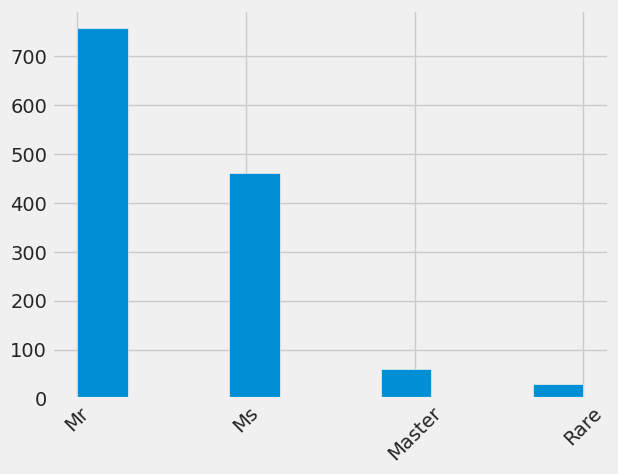

In [7]:
df["Title"] = df["Title"].replace([np.nan, 'Lady', 'the Countess', 'Countess', 'Capt', 'Col','Don', 'Dr', 
                                             'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')

df.Title = df.Title.replace(["Miss", "Ms", "Mme", "Mlle", "Mrs"], 'Ms')

df.Title.hist(xrot=45)

## Преобразование кабин

In [8]:
df.Cabin.unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

In [9]:
df.Cabin = df.Cabin.str.extract('^(\w)', expand=True)

df.Cabin.unique()

array([nan, 'C', 'E', 'G', 'D', 'A', 'B', 'F', 'T'], dtype=object)

In [10]:
df.Cabin.value_counts(dropna=False)

NaN    1014
C        94
B        65
D        46
E        41
A        22
F        21
G         5
T         1
Name: Cabin, dtype: int64

##  Преобразование билетов

In [11]:
df.Ticket.unique()

array(['A/5 21171', 'PC 17599', 'STON/O2. 3101282', '113803', '373450',
       '330877', '17463', '349909', '347742', '237736', 'PP 9549',
       '113783', 'A/5. 2151', '347082', '350406', '248706', '382652',
       '244373', '345763', '2649', '239865', '248698', '330923', '113788',
       '347077', '2631', '19950', '330959', '349216', 'PC 17601',
       'PC 17569', '335677', 'C.A. 24579', 'PC 17604', '113789', '2677',
       'A./5. 2152', '345764', '2651', '7546', '11668', '349253',
       'SC/Paris 2123', '330958', 'S.C./A.4. 23567', '370371', '14311',
       '2662', '349237', '3101295', 'A/4. 39886', 'PC 17572', '2926',
       '113509', '19947', 'C.A. 31026', '2697', 'C.A. 34651', 'CA 2144',
       '2669', '113572', '36973', '347088', 'PC 17605', '2661',
       'C.A. 29395', 'S.P. 3464', '3101281', '315151', 'C.A. 33111',
       'S.O.C. 14879', '2680', '1601', '348123', '349208', '374746',
       '248738', '364516', '345767', '345779', '330932', '113059',
       'SO/C 14885', '31012

In [12]:
df.Ticket = df.Ticket.str.extract('^(.*) \d*$', expand=True)

In [13]:
df.Ticket.value_counts(dropna=False)

NaN            961
PC              92
C.A.            46
SOTON/O.Q.      16
STON/O 2.       14
W./C.           14
CA.             12
A/5             12
SC/PARIS        11
A/5.            10
CA              10
F.C.C.           9
SOTON/OQ         8
C                8
S.O.C.           7
STON/O2.         7
S.O./P.P.        7
A/4              6
SC/Paris         5
PP               4
SC/AH            4
A.5.             3
SOTON/O2         3
S.C./PARIS       3
F.C.             3
A/4.             3
A./5.            3
SC               2
P/PP             2
WE/P             2
W.E.P.           2
C.A./SOTON       1
SC/A.3           1
STON/OQ.         1
AQ/4             1
A. 2.            1
LP               1
SC/A4            1
Fa               1
S.W./PP          1
SC/AH Basle      1
A/S              1
SCO/W            1
SW/PP            1
W/C              1
S.O.P.           1
A4.              1
SO/C             1
S.P.             1
S.C./A.4.        1
AQ/3.            1
Name: Ticket, dtype: int64

<Axes: >

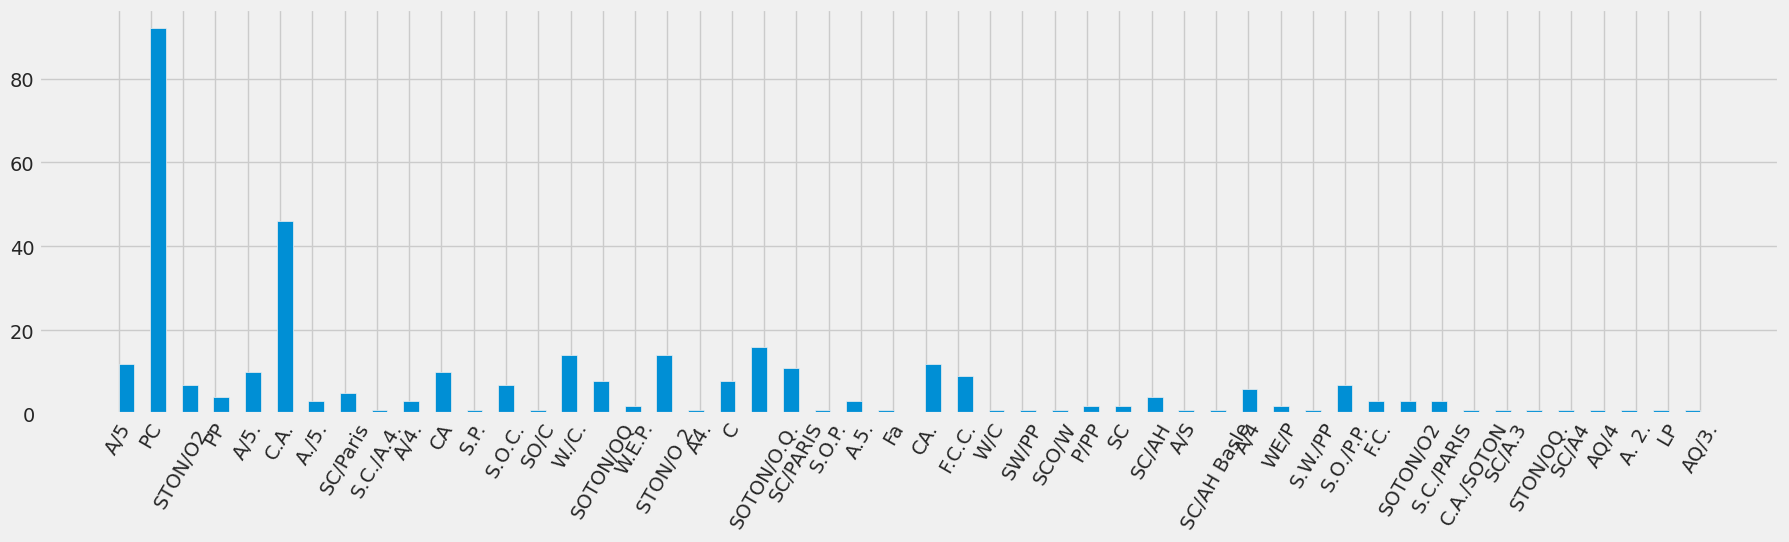

In [14]:
df.Ticket.hist(xrot=60, figsize=(20, 5), bins=100)

In [15]:
df.Ticket.fillna('Empty', inplace = True)

## Заполнение NaN

In [16]:
df_nan = df.copy()

df_nan.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 1 to 1309
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  1309 non-null   int64  
 1   Pclass    1309 non-null   int64  
 2   Name      1309 non-null   object 
 3   Sex       1309 non-null   object 
 4   Age       1046 non-null   float64
 5   SibSp     1309 non-null   int64  
 6   Parch     1309 non-null   int64  
 7   Ticket    1309 non-null   object 
 8   Fare      1308 non-null   float64
 9   Cabin     295 non-null    object 
 10  Embarked  1307 non-null   object 
 11  Title     1309 non-null   object 
dtypes: float64(2), int64(4), object(6)
memory usage: 132.9+ KB


In [17]:
df_nan.Ticket.fillna('Empty', inplace = True)
df_nan.Cabin.fillna('Empty', inplace=True)
df_nan.Age.fillna(df_nan.Age.mean(), inplace = True) 
df_nan.Fare.fillna(df_nan.Fare.median(), inplace = True)
df_nan.Embarked.fillna(df_nan.Embarked.mode()[0], inplace = True)

In [18]:
df_nan.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 1 to 1309
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  1309 non-null   int64  
 1   Pclass    1309 non-null   int64  
 2   Name      1309 non-null   object 
 3   Sex       1309 non-null   object 
 4   Age       1309 non-null   float64
 5   SibSp     1309 non-null   int64  
 6   Parch     1309 non-null   int64  
 7   Ticket    1309 non-null   object 
 8   Fare      1309 non-null   float64
 9   Cabin     1309 non-null   object 
 10  Embarked  1309 non-null   object 
 11  Title     1309 non-null   object 
dtypes: float64(2), int64(4), object(6)
memory usage: 132.9+ KB


In [19]:
df_transformed = df_nan.copy()

binary_features = ['Sex']
mapping = {'male': True, 'female': False}

df_transformed.loc[:, binary_features] = df_transformed.loc[:, binary_features].applymap(lambda x: mapping[x])

df_transformed.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 1 to 1309
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  1309 non-null   int64  
 1   Pclass    1309 non-null   int64  
 2   Name      1309 non-null   object 
 3   Sex       1309 non-null   bool   
 4   Age       1309 non-null   float64
 5   SibSp     1309 non-null   int64  
 6   Parch     1309 non-null   int64  
 7   Ticket    1309 non-null   object 
 8   Fare      1309 non-null   float64
 9   Cabin     1309 non-null   object 
 10  Embarked  1309 non-null   object 
 11  Title     1309 non-null   object 
dtypes: bool(1), float64(2), int64(4), object(5)
memory usage: 124.0+ KB


In [20]:
df_transformed.corr().style.background_gradient(cmap='coolwarm')

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
Survived,1.000000,-0.264710,-0.688371,-0.048483,0.002370,0.108919,0.233773
Pclass,-0.264710,1.000000,0.124617,-0.366371,0.060832,0.018322,-0.558683
Sex,-0.688371,0.124617,1.000000,0.057397,-0.109609,-0.213125,-0.185681
Age,-0.048483,-0.366371,0.057397,1.000000,-0.190747,-0.130872,0.170851
SibSp,0.002370,0.060832,-0.109609,-0.190747,1.000000,0.373587,0.160349
Parch,0.108919,0.018322,-0.213125,-0.130872,0.373587,1.000000,0.221635
Fare,0.233773,-0.558683,-0.185681,0.170851,0.160349,0.221635,1.000000


# One hot encoding

In [21]:
ONE_HOT_COL = ['Embarked', 'Title', 'Ticket', 'Cabin']

temp = pd.get_dummies(df_transformed[ONE_HOT_COL], prefix=ONE_HOT_COL, dtype=bool)

df_transformed = pd.concat([temp, df_transformed.select_dtypes('number'), 
                            df_transformed.select_dtypes('bool')], axis=1)

# Построение модели

In [22]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df_transformed.drop(columns='Survived'), df_transformed.Survived)

In [23]:
X_train

,Embarked_C,Embarked_Q,Embarked_S,Title_Master,Title_Mr,Title_Ms,Title_Rare,Ticket_A. 2.,Ticket_A./5.,Ticket_A.5.,...,Cabin_Empty,Cabin_F,Cabin_G,Cabin_T,Pclass,Age,SibSp,Parch,Fare,Sex
PassengerId,,,,,,,,,,,,,,,,,,,,,
472,False,False,True,False,True,False,False,False,False,False,...,True,False,False,False,3,38.000000,0,0,8.6625,True
381,True,False,False,False,False,True,False,False,False,False,...,True,False,False,False,1,42.000000,0,0,227.5250,False
50,False,False,True,False,False,True,False,False,False,False,...,True,False,False,False,3,18.000000,1,0,17.8000,False
609,True,False,False,False,False,True,False,False,False,False,...,True,False,False,False,2,22.000000,1,2,41.5792,False
479,False,False,True,False,True,False,False,False,False,False,...,True,False,False,False,3,22.000000,0,0,7.5208,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75,False,False,True,False,True,False,False,False,False,False,...,True,False,False,False,3,32.000000,0,0,56.4958,True
1290,False,False,True,False,True,False,False,False,False,False,...,True,False,False,False,3,22.000000,0,0,7.7750,True
1300,False,True,False,False,False,True,False,False,False,False,...,True,False,False,False,3,29.881138,0,0,7.7208,False


In [26]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score, recall_score, f1_score,accuracy_score


model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

print(f'Accuracy train: {accuracy_score(y_train, y_pred_train)}, test: {accuracy_score(y_test, y_pred_test)}')
print(f'Precision train: {precision_score(y_train, y_pred_train)}, test: {precision_score(y_test, y_pred_test)}')
print(f'Recall train: {recall_score(y_train, y_pred_train)**0.5}, test: {recall_score(y_test, y_pred_test)**0.5}')
print(f'F1 train: {f1_score(y_train, y_pred_train)}, test: {f1_score(y_test, y_pred_test)}')

Accuracy train: 0.8776758409785933, test: 0.8414634146341463
Precision train: 0.8507462686567164, test: 0.848
Recall train: 0.8960005030179675, test: 0.8732639509664613
F1 train: 0.8260869565217391, test: 0.8030303030303031


/home/vlaserega/.local/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metrics.RocCurveDisplay.from_predictions` or :meth:`sklearn.metrics.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


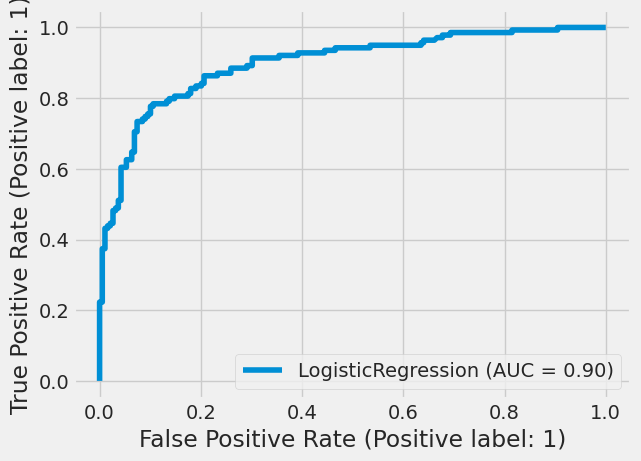

In [27]:
from sklearn.metrics import plot_roc_curve

plot_roc_curve(model, X_test, y_test)

In [28]:
from sklearn.metrics import confusion_matrix


pd.DataFrame(confusion_matrix(y_train, y_pred_train)[::-1, ::-1],
             index=['Actual positive', 'Actual negative'], 
             columns=['Pred positive', 'Pred negative']).style.background_gradient()

,Pred positive,Pred negative
Actual positive,285,70
Actual negative,50,576
